# Machine Learning and Statistics Project
> In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests

In [1]:
# Imported Necessary Libraries for Project
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import tensorflow as tf 
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

The first steps of this project will be to import the dataset and inspect the features of it. The dataset contains values for windspeed and power output for wind turbines. The goal of the project is to train a machine learning model to predict the power output of wind turbines based on windspeed.

In [2]:
# Imported dataset
raw_df = pd.read_csv('powerproduction.csv')

In [3]:
raw_df.shape

(500, 2)

In [4]:
raw_df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [5]:
raw_df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [6]:
raw_df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


The extreme values of the dataset make for interesting reading. The power output for the lowest and hisghest windspeeds are equal to zero. This may be due to error in measuring the power output or missing measurements. As such it will be import to factor this in when preparing the dataset for machine learning.

In [7]:
raw_df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


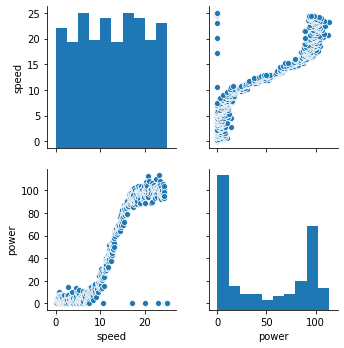

In [8]:
sns.pairplot(raw_df)
plt.show()

## Clean DataSet

To clean the dataset we first need to identify irregular data.

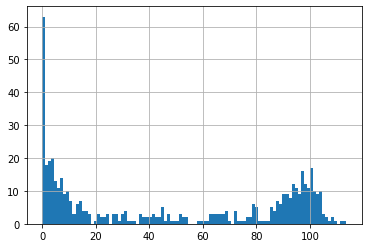

In [9]:
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
raw_df['power'].hist(bins=100)
plt.show()

As mentioned previously, the dataset contains a number of entries where the power output is equal to 0. This occurs at various intervals right throughout the dataset, as seen below. The first step will be to remove these erroneous entries.

In [10]:
raw_df.loc[raw_df['power'] == 0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [11]:
df = raw_df.copy()

In [12]:
df = df.loc[df['power'] != 0]
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


In [13]:
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


As we can now see, 49 entries throughout the dataset where power output is equal to zero have been removed. The next step will be to remove any duplicate entries in the dataset.

In [14]:
df.drop_duplicates(subset = ['power'], keep='last')

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


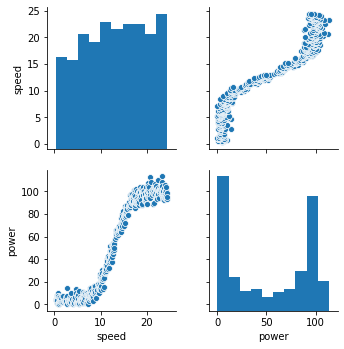

In [15]:
sns.pairplot(df)
plt.show()

## Training

## Keras

the dataset will first be split into a trainging set and a test set. The test set will be used in the final evaluation of the model

In [16]:
#https://www.tensorflow.org/tutorials/keras/regression
train_dataset = df.sample(frac=0.8, random_state=1)
test_dataset = df.drop(train_dataset.index)

In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('power')
test_labels = test_features.pop('power')

In [18]:
# Normalisation
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
speed,13.000111,6.819504
power,52.978911,40.586800


As the windspeed and power output are measured on different scales it is importantant to normalise the data we use for machine learning. The feautures of the dataset will be multiplied by the weights used in the model and as such normalisation allows for consistency accroos the training set.

In [19]:
normalizer = preprocessing.Normalization()

In [20]:
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[13.000111]


In [21]:
speed = np.array(train_features['speed'])

speed_normalizer = preprocessing.Normalization(input_shape=[1,])
speed_normalizer.adapt(speed)

In [22]:
# Define the Model that will be used to train the dataset 
def build_and_compile_model(norm):
  model = kr.Sequential([
      norm,
      layers.Dense(64, activation='relu', input_shape=[1,]),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='sigmoid'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),metrics=['mse'])
  return model

In [23]:
model = build_and_compile_model(speed_normalizer)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,516
Trainable params: 8,513
Non-trainable params: 3
_________________________________________________________________


In [25]:
#model.compile(
#    optimizer=tf.optimizers.Adam(learning_rate=0.1),
#    loss='mean_absolute_error', metrics='accuracy')

In [26]:
%%time
history = model.fit(
    train_features['speed'], train_labels,
    epochs=500,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


Epoch 1/500
9/9 [==============================] - 1s 64ms/step - loss: 51.7028 - mse: 4334.4908 - val_loss: 48.7152 - val_mse: 3828.9297
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 49.4904 - mse: 4111.2371 - val_loss: 48.2810 - val_mse: 3782.7864
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 53.3959 - mse: 4525.7813 - val_loss: 47.7597 - val_mse: 3728.0251
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 51.4527 - mse: 4293.3217 - val_loss: 47.1596 - val_mse: 3662.9829
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 47.7351 - mse: 3905.4156 - val_loss: 46.5074 - val_mse: 3583.2361
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 51.6705 - mse: 4220.0687 - val_loss: 45.7918 - val_mse: 3486.4028
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 48.1147 - mse: 3895.6679 - val_loss: 45.0410 - val_mse: 3386.6887
Epoch 8/500
9/9 [=======================

9/9 [==============================] - 0s 8ms/step - loss: 31.7616 - mse: 1877.5427 - val_loss: 28.8472 - val_mse: 1612.8013
Epoch 61/500
9/9 [==============================] - 0s 8ms/step - loss: 34.5659 - mse: 2114.9332 - val_loss: 28.6422 - val_mse: 1591.0723
Epoch 62/500
9/9 [==============================] - 0s 8ms/step - loss: 33.4554 - mse: 2010.2917 - val_loss: 28.4232 - val_mse: 1569.4310
Epoch 63/500
9/9 [==============================] - 0s 8ms/step - loss: 31.6468 - mse: 1853.4799 - val_loss: 28.1714 - val_mse: 1547.6246
Epoch 64/500
9/9 [==============================] - 0s 9ms/step - loss: 31.4694 - mse: 1821.1911 - val_loss: 28.0185 - val_mse: 1527.6194
Epoch 65/500
9/9 [==============================] - 0s 9ms/step - loss: 33.2677 - mse: 1943.9755 - val_loss: 27.7462 - val_mse: 1505.6553
Epoch 66/500
9/9 [==============================] - 0s 9ms/step - loss: 30.5158 - mse: 1765.0322 - val_loss: 27.5210 - val_mse: 1485.0165
Epoch 67/500
9/9 [=============================

9/9 [==============================] - 0s 8ms/step - loss: 19.5434 - mse: 769.0224 - val_loss: 17.9146 - val_mse: 663.3563
Epoch 120/500
9/9 [==============================] - 0s 8ms/step - loss: 21.4032 - mse: 855.5709 - val_loss: 17.6594 - val_mse: 650.4703
Epoch 121/500
9/9 [==============================] - 0s 8ms/step - loss: 20.1597 - mse: 783.6068 - val_loss: 17.4958 - val_mse: 638.7910
Epoch 122/500
9/9 [==============================] - 0s 8ms/step - loss: 20.5118 - mse: 814.4987 - val_loss: 17.5730 - val_mse: 630.4768
Epoch 123/500
9/9 [==============================] - 0s 8ms/step - loss: 19.4430 - mse: 754.3668 - val_loss: 17.1668 - val_mse: 616.1278
Epoch 124/500
9/9 [==============================] - 0s 14ms/step - loss: 20.4603 - mse: 782.3263 - val_loss: 17.0384 - val_mse: 605.5599
Epoch 125/500
9/9 [==============================] - 0s 8ms/step - loss: 19.4435 - mse: 734.8150 - val_loss: 16.9192 - val_mse: 595.0051
Epoch 126/500
9/9 [==============================] - 0

Epoch 179/500
9/9 [==============================] - 0s 8ms/step - loss: 11.1062 - mse: 242.7618 - val_loss: 9.3967 - val_mse: 176.7668
Epoch 180/500
9/9 [==============================] - 0s 16ms/step - loss: 10.1820 - mse: 206.7956 - val_loss: 9.2328 - val_mse: 171.4345
Epoch 181/500
9/9 [==============================] - 0s 9ms/step - loss: 10.6723 - mse: 221.8077 - val_loss: 9.1699 - val_mse: 167.5821
Epoch 182/500
9/9 [==============================] - 0s 9ms/step - loss: 10.5237 - mse: 218.7480 - val_loss: 9.1104 - val_mse: 163.6354
Epoch 183/500
9/9 [==============================] - 0s 8ms/step - loss: 11.0442 - mse: 226.1131 - val_loss: 8.9069 - val_mse: 158.1295
Epoch 184/500
9/9 [==============================] - 0s 8ms/step - loss: 9.7362 - mse: 186.8011 - val_loss: 8.8539 - val_mse: 154.5897
Epoch 185/500
9/9 [==============================] - 0s 8ms/step - loss: 9.7025 - mse: 184.9817 - val_loss: 8.6844 - val_mse: 149.8742
Epoch 186/500
9/9 [==============================

9/9 [==============================] - 0s 8ms/step - loss: 4.1186 - mse: 30.3899 - val_loss: 3.8345 - val_mse: 23.2782
Epoch 241/500
9/9 [==============================] - 0s 8ms/step - loss: 3.7494 - mse: 25.1441 - val_loss: 3.9322 - val_mse: 24.4053
Epoch 242/500
9/9 [==============================] - 0s 8ms/step - loss: 3.8279 - mse: 25.8609 - val_loss: 3.7664 - val_mse: 22.3717
Epoch 243/500
9/9 [==============================] - 0s 8ms/step - loss: 3.5394 - mse: 23.0658 - val_loss: 3.8205 - val_mse: 22.9899
Epoch 244/500
9/9 [==============================] - 0s 8ms/step - loss: 3.6918 - mse: 24.1780 - val_loss: 3.7680 - val_mse: 22.1598
Epoch 245/500
9/9 [==============================] - 0s 8ms/step - loss: 3.7791 - mse: 26.4689 - val_loss: 3.7586 - val_mse: 21.8804
Epoch 246/500
9/9 [==============================] - 0s 8ms/step - loss: 3.4472 - mse: 20.8234 - val_loss: 3.6821 - val_mse: 20.9390
Epoch 247/500
9/9 [==============================] - 0s 9ms/step - loss: 3.5847 - m

9/9 [==============================] - 0s 8ms/step - loss: 3.1954 - mse: 17.4795 - val_loss: 3.3724 - val_mse: 18.5400
Epoch 302/500
9/9 [==============================] - 0s 8ms/step - loss: 3.2449 - mse: 16.4768 - val_loss: 3.2378 - val_mse: 16.7281
Epoch 303/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0439 - mse: 14.9191 - val_loss: 3.2374 - val_mse: 16.7736
Epoch 304/500
9/9 [==============================] - 0s 8ms/step - loss: 3.2144 - mse: 17.1029 - val_loss: 3.3556 - val_mse: 18.1387
Epoch 305/500
9/9 [==============================] - 0s 8ms/step - loss: 3.1930 - mse: 16.5009 - val_loss: 3.2801 - val_mse: 17.3191
Epoch 306/500
9/9 [==============================] - 0s 8ms/step - loss: 3.1954 - mse: 16.1350 - val_loss: 3.2356 - val_mse: 16.8007
Epoch 307/500
9/9 [==============================] - 0s 8ms/step - loss: 3.1200 - mse: 16.0253 - val_loss: 3.3014 - val_mse: 17.6128
Epoch 308/500
9/9 [==============================] - 0s 15ms/step - loss: 3.0844 - 

9/9 [==============================] - 0s 9ms/step - loss: 3.0587 - mse: 15.9837 - val_loss: 3.3955 - val_mse: 18.6610
Epoch 363/500
9/9 [==============================] - 0s 9ms/step - loss: 2.9537 - mse: 14.2867 - val_loss: 3.3358 - val_mse: 18.0335
Epoch 364/500
9/9 [==============================] - 0s 9ms/step - loss: 2.9690 - mse: 14.4128 - val_loss: 3.5401 - val_mse: 19.9346
Epoch 365/500
9/9 [==============================] - 0s 16ms/step - loss: 3.0790 - mse: 16.2467 - val_loss: 3.3344 - val_mse: 17.9619
Epoch 366/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0322 - mse: 15.3306 - val_loss: 3.3391 - val_mse: 17.8888
Epoch 367/500
9/9 [==============================] - 0s 9ms/step - loss: 2.9414 - mse: 13.9035 - val_loss: 3.4652 - val_mse: 19.2634
Epoch 368/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0590 - mse: 15.8097 - val_loss: 3.3517 - val_mse: 18.1908
Epoch 369/500
9/9 [==============================] - 0s 8ms/step - loss: 2.8535 - 

9/9 [==============================] - 0s 8ms/step - loss: 3.2306 - mse: 16.3673 - val_loss: 3.3924 - val_mse: 18.4411
Epoch 424/500
9/9 [==============================] - 0s 8ms/step - loss: 2.9925 - mse: 15.2793 - val_loss: 3.3340 - val_mse: 17.9194
Epoch 425/500
9/9 [==============================] - 0s 8ms/step - loss: 2.9808 - mse: 14.9004 - val_loss: 3.4172 - val_mse: 18.7654
Epoch 426/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0980 - mse: 15.8975 - val_loss: 3.3842 - val_mse: 18.2185
Epoch 427/500
9/9 [==============================] - 0s 8ms/step - loss: 2.8103 - mse: 13.1747 - val_loss: 3.3880 - val_mse: 18.6829
Epoch 428/500
9/9 [==============================] - 0s 9ms/step - loss: 3.0160 - mse: 15.1048 - val_loss: 3.4021 - val_mse: 18.7345
Epoch 429/500
9/9 [==============================] - 0s 9ms/step - loss: 3.0961 - mse: 15.7473 - val_loss: 3.3725 - val_mse: 18.2800
Epoch 430/500
9/9 [==============================] - 0s 9ms/step - loss: 2.9082 - m

9/9 [==============================] - 0s 9ms/step - loss: 3.1075 - mse: 15.8412 - val_loss: 3.3651 - val_mse: 18.2196
Epoch 485/500
9/9 [==============================] - 0s 9ms/step - loss: 2.9348 - mse: 15.1773 - val_loss: 3.4028 - val_mse: 18.6416
Epoch 486/500
9/9 [==============================] - 0s 9ms/step - loss: 2.9688 - mse: 15.2330 - val_loss: 3.3982 - val_mse: 18.4718
Epoch 487/500
9/9 [==============================] - 0s 8ms/step - loss: 3.1027 - mse: 15.8766 - val_loss: 3.3561 - val_mse: 18.1850
Epoch 488/500
9/9 [==============================] - 0s 9ms/step - loss: 3.1505 - mse: 16.2766 - val_loss: 3.3895 - val_mse: 18.5093
Epoch 489/500
9/9 [==============================] - 0s 8ms/step - loss: 2.9641 - mse: 15.5790 - val_loss: 3.3917 - val_mse: 18.7051
Epoch 490/500
9/9 [==============================] - 0s 9ms/step - loss: 3.1180 - mse: 16.3323 - val_loss: 3.3906 - val_mse: 18.4077
Epoch 491/500
9/9 [==============================] - 0s 16ms/step - loss: 3.0980 - 

In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [POWER]')
  plt.legend()
  plt.grid(True)

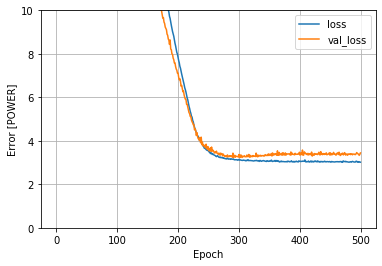

In [28]:
plot_loss(history)

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
495,3.043660,15.603210,3.402571,18.768024,495
496,3.016704,15.473467,3.384032,18.484646,496
497,3.039074,15.639769,3.332148,17.845018,497
498,3.022974,15.391645,3.373792,18.394958,498
499,3.018027,15.545259,3.442364,19.045675,499


In [31]:
# generated 450 values, same as the original dataset, between 0 and 25 for prediction
x = tf.linspace(0.0, 25, 450)
y = model.predict(x)

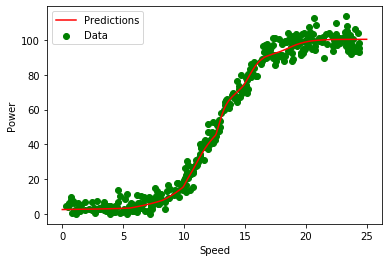

In [32]:
def plot_speed(x, y):
  plt.scatter(train_features['speed'], train_labels,  c='green',  label='Data')
  plt.plot(x, y, 'r', label='Predictions')
  plt.xlabel('Speed')
  plt.ylabel('Power')
  plt.legend()

plot_speed(x,y)

This graph demonstrates that the prediction made by the model correspond with the original dataset. This give a strong decree of confidence with the model created for this purpose.

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')